In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from fastai.vision import *
from fastai.metrics import error_rate

import imageio
import os

### EDA

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train_df.drop("label", axis=1)
Y_train = train_df["label"]

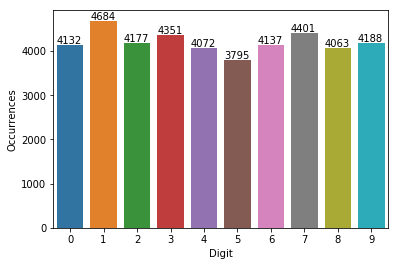

In [6]:
ax = sns.countplot(Y_train)

plt.xlabel("Digit")
plt.ylabel("Occurrences")

counts = Y_train.value_counts().reset_index().sort_values(by="index").set_index("index")

for i in range(10):
    plt.text(i - 0.4, counts.iloc[i]["label"] + 30, str(counts.iloc[i]["label"]))

plt.show()

In [7]:
print(X_train.isnull().any().sum(), "missing values in training set.")
print(test_df.isnull().any().sum(), "missing values in test set.")

0 missing values in training set.
0 missing values in test set.


Transform the X_train dataframe into a numpy array, where each entry corresponds to a 28x28 image.

In [8]:
X_train = X_train.values.reshape(-1, 28, 28, 1) # 1 extra dimension for channel
test_df = test_df.values.reshape(-1, 28, 28, 1)

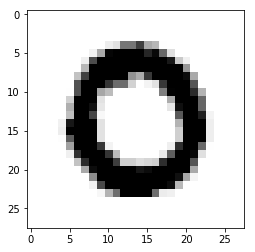

In [9]:
g = plt.imshow(X_train[1][:, :, 0], cmap="gray_r")

Create a folder with the digit images.

In [30]:
images_folder = "mnist-images"
if not os.path.exists(images_folder):
    os.mkdir(images_folder)
    
for i in range(len(X_train)):
    output_filename = os.path.join(images_folder, str(i) + ".png")
    if not os.path.exists(output_filename):
        imageio.imwrite(output_filename, X_train[i][:,:,0].astype("uint8"))

Create a dataframe with image file names and label.

In [35]:
image_filenames = [str(i) + ".png" for i in range(len(X_train))]
filenames_df = pd.DataFrame(data={"filenames":image_filenames, "label":Y_train})

Build the ImageDataBunch wrapper.

In [43]:
data = ImageDataBunch.from_df(images_folder, filenames_df, bs=32, size=28).normalize()

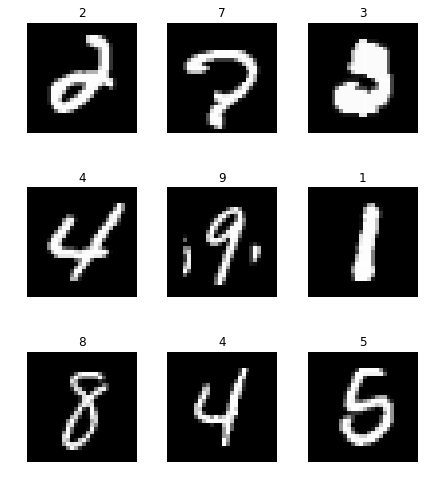

In [45]:
data.show_batch(rows=3, figsize=(6, 7))

In [46]:
print(data.classes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Training: resnet50

In [47]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)